## Extended Figure 2

This manuscript generates extended data figure 2 and relavent data of the paper. 

Kexin Dong

Date created: May 24, 2024  

Last updated: Oct 20, 2025

In [1]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# load the H2M Database result data 
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned_v3.csv')
df_binded

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,ID_human,ID_mouse,Database,ID_db,pe_human,pe_mouse,be_human,be_mouse,expanded,flank_size
0,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58858888,58858888,C,...,CLINVAR-H2135681,CLINVAR-H2135681-M01-V01,CLINVAR,2552144.0,False,False,False,False,False,2
1,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861808,58861808,A,...,CLINVAR-H2135684,CLINVAR-H2135684-M01-V01,CLINVAR,2650587.0,False,False,False,False,False,3
2,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861858,58861858,G,...,CLINVAR-H2135685,CLINVAR-H2135685-M01-V01,CLINVAR,2306103.0,False,False,False,False,False,3
3,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861859,58861859,C,...,CLINVAR-H2135686,CLINVAR-H2135686-M01-V01,CLINVAR,2513094.0,False,False,False,False,False,3
4,A1BG,ENSG00000121410.7,ENST00000263100.3,chr19,8,-,True,58861930,58861930,C,...,CLINVAR-H2135688,CLINVAR-H2135688-M01-V01,CLINVAR,2211717.0,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910905,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78097611,78097611,T,...,CLINVAR-H0083124,NaN,CLINVAR,2470455.0,False,False,False,False,False,0
3910906,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78097791,78097791,C,...,CLINVAR-H0083127,NaN,CLINVAR,2258347.0,False,False,False,False,False,0
3910907,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78097803,78097803,T,...,CLINVAR-H0083128,NaN,CLINVAR,2600723.0,False,False,False,False,False,0
3910908,ZZZ3,ENSG00000036549.8,ENST00000370801.3,chr1,11,-,True,78098289,78098289,T,...,CLINVAR-H0083141,NaN,CLINVAR,2269111.0,False,False,False,False,False,0


# Extended Figure 3a

The percentages of human mutations in the H2M Database that can be modeled in the mouse genome, stratified by the data source, modeling strategy, and regions and types of mutation.

### Stratified by types

In [3]:
name_list = ['AACR','COSMIC','CLINVAR']
fs = 0
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = df_binded[df_binded['Database']==name].reset_index(drop=True)
    for i,type_list in enumerate([['SNP','DNP','ONP','TNP'],['INS'],['DEL']]):
        list_of_region.append(['Substitution','Insertion','Deletion'][i])
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[[x in type_list for x in df['type_h']]].reset_index(drop=True)
        l_1 = len(df_sub['ID_human'].unique())
        df_sub_2 = df_sub[df_sub['status']==True]
        l_2 = len(df_sub_2['ID_human'].unique())
        print(f'{name} in {list_of_region[i]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df_sub[df_sub['class']==0]['ID_human'].unique()))
        list_of_class_1.append(len(df_sub[df_sub['class']==1]['ID_human'].unique()))
        list_of_class_2.append(len(df_sub[df_sub['class']==2]['ID_human'].unique()))
        list_of_class_3.append(len(df_sub[df_sub['class']==3]['ID_human'].unique()))

AACR in Substitution: 630828 out of 723322 (87.21%) mutations can be modeled.

AACR in Insertion: 23034 out of 27960 (82.38%) mutations can be modeled.

AACR in Deletion: 49399 out of 67127 (73.59%) mutations can be modeled.

COSMIC in Substitution: 435394 out of 525827 (82.80%) mutations can be modeled.

COSMIC in Insertion: 364 out of 469 (77.61%) mutations can be modeled.

COSMIC in Deletion: 898 out of 1207 (74.40%) mutations can be modeled.

CLINVAR in Substitution: 1535671 out of 1875913 (81.86%) mutations can be modeled.

CLINVAR in Insertion: 35073 out of 54457 (64.40%) mutations can be modeled.

CLINVAR in Deletion: 72293 out of 108103 (66.87%) mutations can be modeled.



In [4]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Mutation_Type','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,AACR,0,Substitution,723322,630828,558529,36721,36255,0
1,AACR,0,Insertion,27960,23034,3105,57,19874,0
2,AACR,0,Deletion,67127,49399,8298,68,41034,0
3,COSMIC,0,Substitution,525827,435394,325743,21343,88713,0
4,COSMIC,0,Insertion,469,364,90,1,273,0
5,COSMIC,0,Deletion,1207,898,332,6,560,0
6,CLINVAR,0,Substitution,1875913,1535671,1262372,82259,192812,0
7,CLINVAR,0,Insertion,54457,35073,5023,101,29949,0
8,CLINVAR,0,Deletion,108103,72293,10745,46,61502,0


In [5]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
# df.to_csv('.../fs_stat_3.csv', index = False)
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,AACR,0,Substitution,723322,630828,558529,36721,36255,0,0.872126
1,AACR,0,Insertion,27960,23034,3105,57,19874,0,0.823820
2,AACR,0,Deletion,67127,49399,8298,68,41034,0,0.735904
3,COSMIC,0,Substitution,525827,435394,325743,21343,88713,0,0.828018
4,COSMIC,0,Insertion,469,364,90,1,273,0,0.776119
5,COSMIC,0,Deletion,1207,898,332,6,560,0,0.743993
6,CLINVAR,0,Substitution,1875913,1535671,1262372,82259,192812,0,0.818626
7,CLINVAR,0,Insertion,54457,35073,5023,101,29949,0,0.644049
8,CLINVAR,0,Deletion,108103,72293,10745,46,61502,0,0.668742


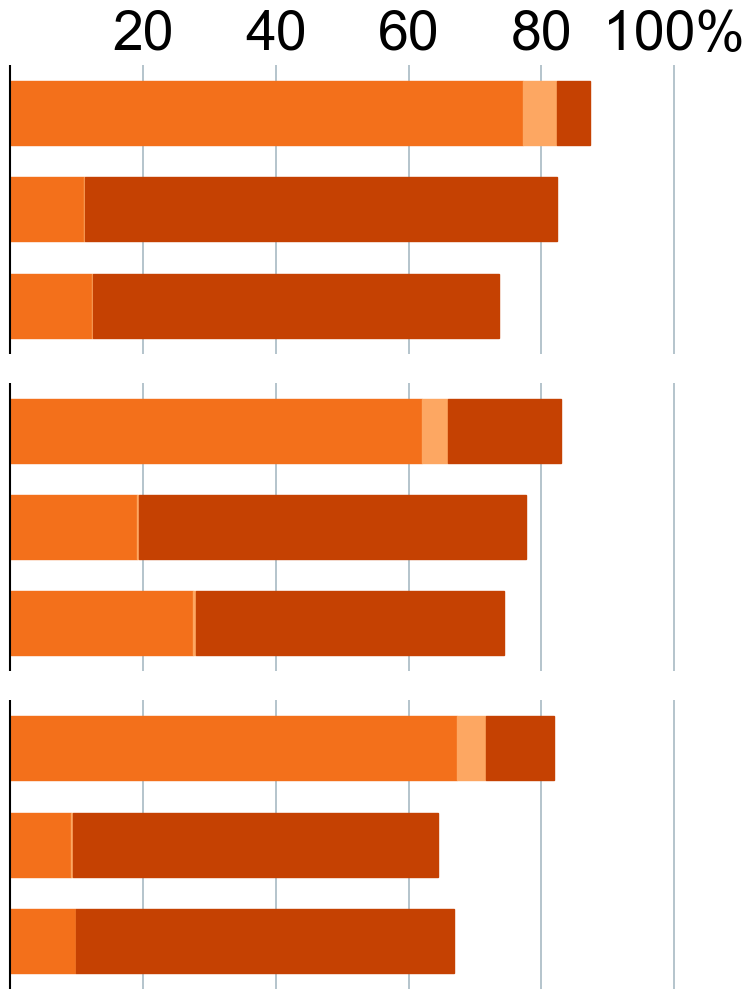

In [8]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 12))
fig.subplots_adjust(hspace=0.1)
for t in [0,1,2]:
    name = name_list[t]
    x,y,z = df.iloc[3*t,3:9],df.iloc[3*t+1,3:9], df.iloc[3*t+2,3:9]
    x = x/x[0]
    y = y/y[0]
    z = z/z[0]
    bars = ax[t].barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.9,0.6, 0.3], [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.9,0.6, 0.3], [x[3],y[3],z[3]], left = [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.9,0.6, 0.3], [x[4],y[4],z[4]], left = [x[2]+x[3],y[2]+y[3],z[2]+z[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['']*5, size=25, fontfamily="Arial", fontweight=100)
    if t == 0:
        ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=40, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, 1.05))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'figures/ext_3a_type.pdf', bbox_inches='tight')
plt.show()

### Stratified by regions    

In [9]:
fs = 0
name_list = ['AACR','COSMIC','CLINVAR']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []

# df = df_binded[df_binded['type_h']=='SNP'].reset_index(drop=True)
for x in [0,1,2]:
    name = name_list[x]
    # SNV-only
    df_k = df_binded[df_binded['Database']==name].reset_index(drop=True)
    # exonic muts
    df_sub = df_k[[('E' in str(x)) for x in df_k['exon_h']]].reset_index(drop=True)
    list_of_region.append('Exonic')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['ID_human'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['ID_human'].unique())
    print(f'{name} in Exonic Region: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['ID_human'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['ID_human'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['ID_human'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['ID_human'].unique()))

    # splicing muts
    df_sub= df_k[[('splice' in str(x)) for x in df_k['HGVSp_h']]].reset_index(drop=True)
    list_of_region.append('Splice_Site')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['ID_human'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['ID_human'].unique())
    print(f'{name} in Splice Site: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['ID_human'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['ID_human'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['ID_human'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['ID_human'].unique()))
    
    # deep intronic muts
    list_a = [('I' in str(x)) for x in df_k['exon_h']]
    list_b = [('splice' not in str(x)) for x in df_k['HGVSp_h']]
    list_bind = [(x and y) for x,y in zip(list_a,list_b)]
    df_sub = df_k[list_bind].reset_index(drop=True)
    list_of_region.append('Deep_Intronic')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['ID_human'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['ID_human'].unique())
    print(f'{name} in Deep Intronic Region: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['ID_human'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['ID_human'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['ID_human'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['ID_human'].unique()))

AACR in Exonic Region: 663997 out of 760385 (87.32%) mutations can be modeled.

AACR in Splice Site: 13619 out of 19159 (71.08%) mutations can be modeled.

AACR in Deep Intronic Region: 23554 out of 37400 (62.98%) mutations can be modeled.

COSMIC in Exonic Region: 347744 out of 391416 (88.84%) mutations can be modeled.

COSMIC in Splice Site: 6464 out of 7926 (81.55%) mutations can be modeled.

COSMIC in Deep Intronic Region: 72686 out of 114144 (63.68%) mutations can be modeled.

CLINVAR in Exonic Region: 1435486 out of 1709245 (83.98%) mutations can be modeled.

CLINVAR in Splice Site: 22999 out of 29764 (77.27%) mutations can be modeled.

CLINVAR in Deep Intronic Region: 165706 out of 268838 (61.64%) mutations can be modeled.



In [10]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Mutation_Type','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,AACR,0,Exonic,760385,663997,569230,36846,58601,0
1,AACR,0,Splice_Site,19159,13619,0,0,13619,0
2,AACR,0,Deep_Intronic,37400,23554,0,0,23554,0
3,COSMIC,0,Exonic,391416,347744,325952,21350,847,0
4,COSMIC,0,Splice_Site,7926,6464,0,0,6464,0
5,COSMIC,0,Deep_Intronic,114144,72686,0,0,72686,0
6,CLINVAR,0,Exonic,1709245,1435486,1277170,82406,77682,0
7,CLINVAR,0,Splice_Site,29764,22999,0,0,22999,0
8,CLINVAR,0,Deep_Intronic,268838,165706,0,0,165706,0


In [12]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
#df.to_csv('.../fs_stat_2.csv', index = False)
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,AACR,0,Exonic,760385,663997,569230,36846,58601,0,0.873238
1,AACR,0,Splice_Site,19159,13619,0,0,13619,0,0.710841
2,AACR,0,Deep_Intronic,37400,23554,0,0,23554,0,0.629786
3,COSMIC,0,Exonic,391416,347744,325952,21350,847,0,0.888426
4,COSMIC,0,Splice_Site,7926,6464,0,0,6464,0,0.815544
5,COSMIC,0,Deep_Intronic,114144,72686,0,0,72686,0,0.636792
6,CLINVAR,0,Exonic,1709245,1435486,1277170,82406,77682,0,0.839836
7,CLINVAR,0,Splice_Site,29764,22999,0,0,22999,0,0.772712
8,CLINVAR,0,Deep_Intronic,268838,165706,0,0,165706,0,0.616379


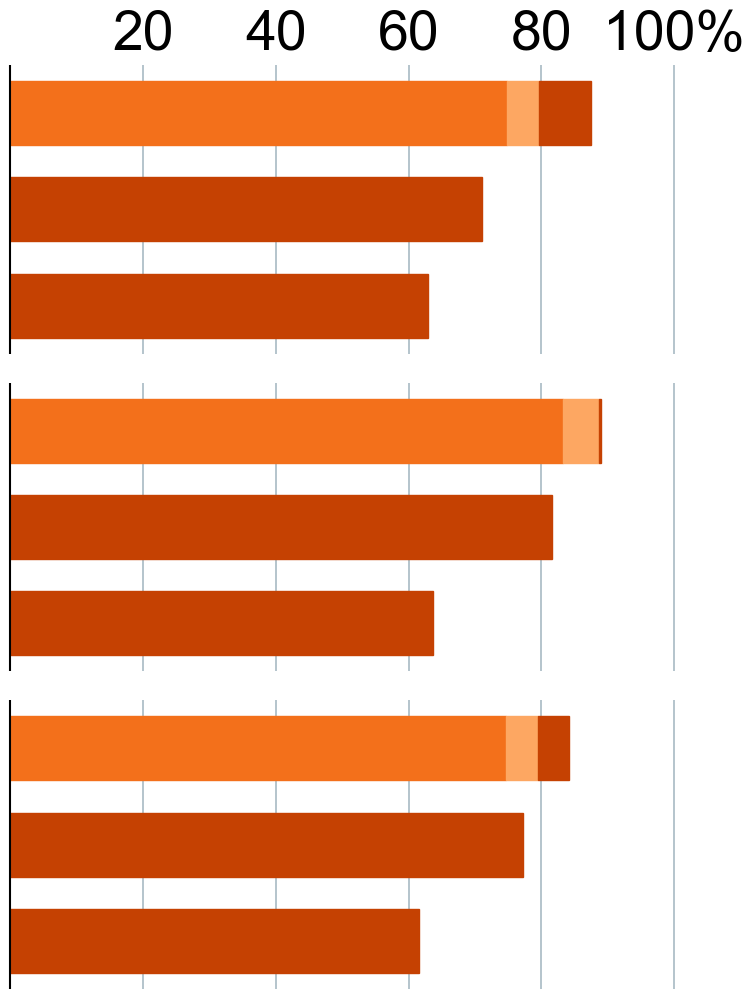

In [13]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 12) )
fig.subplots_adjust(hspace=0.1)
for t in [0,1,2]:
    name = name_list[t]
    x,y,z = df.iloc[3*t,3:9],df.iloc[3*t+1,3:9], df.iloc[3*t+2,3:9]
    x = x/x[0]
    y = y/y[0]
    z = z/z[0]
    bars = ax[t].barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.9,0.6, 0.3], [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.9,0.6, 0.3], [x[3],y[3],z[3]], left = [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.9,0.6, 0.3], [x[4],y[4],z[4]], left = [x[2]+x[3],y[2]+y[3],z[2]+z[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['']*5, size=25, fontfamily="Arial", fontweight=100)
    if t == 0:
        ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=40, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, 1.05))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'figures/ext_3a_region.pdf', bbox_inches='tight')
plt.show()

# Extended Figure 3b

The relationship between percentage of modelable mutations and flank size in the H2M Database.

In [14]:
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

l_1 = len(df_binded['ID_human'].unique())
for fs in [0,2,4,6,8,10,20,30,40,50,100,200]:
    df = df_binded[df_binded['flank_size'] >= fs].reset_index(drop=True)
    list_of_n.append(name)
    list_of_fs.append(fs)
    df_sub = df[df['status']==True]
    l_2 = len(df_sub['ID_human'].unique())
    print(f'All with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df[df['class']==0]['ID_human'].unique()))
    list_of_class_1.append(len(df[df['class']==1]['ID_human'].unique()))
    list_of_class_2.append(len(df[df['class']==2]['ID_human'].unique()))
    list_of_class_3.append(len(df[df['class']==3]['ID_human'].unique()))
    
df = pd.DataFrame(zip(list_of_n, list_of_fs,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']

All with 0: 2782954 out of 3384385 (82.23%) mutations can be modeled.

All with 2: 2401013 out of 3384385 (70.94%) mutations can be modeled.

All with 4: 2173546 out of 3384385 (64.22%) mutations can be modeled.

All with 6: 2019938 out of 3384385 (59.68%) mutations can be modeled.

All with 8: 1896967 out of 3384385 (56.05%) mutations can be modeled.

All with 10: 1791106 out of 3384385 (52.92%) mutations can be modeled.

All with 20: 1408442 out of 3384385 (41.62%) mutations can be modeled.

All with 30: 1168152 out of 3384385 (34.52%) mutations can be modeled.

All with 40: 994254 out of 3384385 (29.38%) mutations can be modeled.

All with 50: 870467 out of 3384385 (25.72%) mutations can be modeled.

All with 100: 533546 out of 3384385 (15.76%) mutations can be modeled.

All with 200: 259937 out of 3384385 (7.68%) mutations can be modeled.



In [15]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df['Database'] = 'All'
#df.to_csv('.../fs_stat_fs_all.csv', index = False)

In [16]:
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,All,0,3384385,2782954,2174237,140602,470972,0,0.822292
1,All,2,3384385,2401013,1990010,115012,297198,0,0.709438
2,All,4,3384385,2173546,1860627,106612,207180,0,0.642228
3,All,6,3384385,2019938,1749766,99874,170969,0,0.596840
4,All,8,3384385,1896967,1652993,93932,150574,0,0.560506
5,All,10,3384385,1791106,1567108,88715,135737,0,0.529226
6,All,20,3384385,1408442,1244829,69041,94844,0,0.416159
7,All,30,3384385,1168152,1036797,56492,75086,0,0.345159
8,All,40,3384385,994254,884848,47286,62306,0,0.293777
9,All,50,3384385,870467,775191,40948,54507,0,0.257201


In [17]:
coor_y = [0.3*(x+1) for x in range(len(df))]

In [18]:
width = 2*np.pi / len(df.index)
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles = angles[1:] + angles[:1]

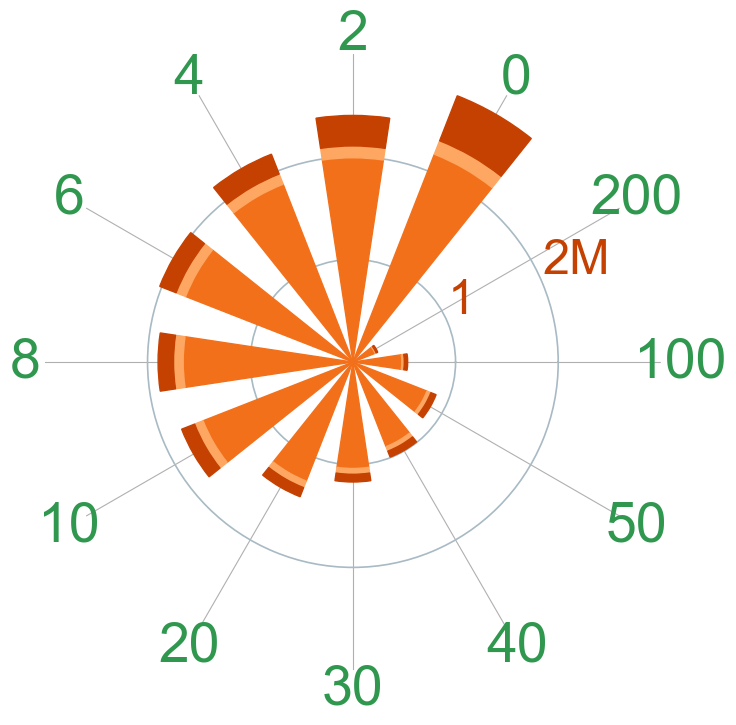

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(8, 8), 
                       subplot_kw={'polar': True}
                       )
x,y,z = df['Class_0'], df['Class_1'], df['Class_2']

bars = ax.barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
for bar in bars:
    bar.set_linestyle('--')
    bar.set_linewidth(1)
ax.bar(angles, x, width = 0.3, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
ax.bar(angles, y, bottom = x, width = 0.3, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
ax.bar(angles, z, bottom = [(x1+y1) for (x1,y1) in zip(x,y)], width = 0.3, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
ax.set_ylim(0, 3000000)
ax.yaxis.set_ticks([x*1000000 for x in range(1,3)])
ax.yaxis.set_ticklabels(['1','2M'], size=35, fontfamily="Arial", fontweight=100, color = plt.cm.Oranges(0.8))
ax.xaxis.set_ticks(angles)
ax.xaxis.set_ticklabels(list(df['Flank_Size']), size=40, fontfamily="Arial", fontweight=100, color = plt.cm.Greens(0.7))
ax.set_axisbelow(True)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines['polar'].set_visible(False)
# ax.xaxis.set_visible(False)
plt.savefig(f'figures/ext_3b.pdf', bbox_inches='tight')
plt.show()